In [1]:
from scipy.io import loadmat
import  numpy as np
from matplotlib import pyplot as plt

In [2]:
faces = loadmat("ex7faces.mat")
X = faces['X']
X.shape


(5000, 1024)

In [3]:
def plot_n_image(X, n):
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

In [4]:
def pca(X):
    X = (X - X.mean()) / X.std()
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    U, S, V = np.linalg.svd(cov)
    return U, S, V

In [5]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

In [6]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

In [7]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

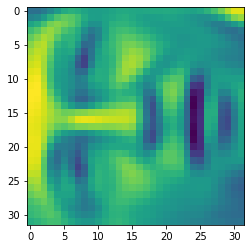

In [8]:
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)
plt.show()